In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [24, 30, 18, 35],
    'City': ['NY', 'LA', 'Chicago', 'Houston']
}
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,24,NY
1,Bob,30,LA
2,Charlie,18,Chicago
3,Diana,35,Houston


In [8]:
# Looking at the first rows
print(df.head(2))  # shows first 5 rows

print("================================")

# Looking at the last rows
print(df.tail(2))  # shows last 5 rows

    Name  Age City
0  Alice   24   NY
1    Bob   30   LA
      Name  Age     City
2  Charlie   18  Chicago
3    Diana   35  Houston


In [3]:
# Selecting a column
df['Age']

0    24
1    30
2    18
3    35
Name: Age, dtype: int64

In [9]:
# Selecting multiple columns
df[["Name", "Age"]]

,Name,Age
0,Alice,24
1,Bob,30
2,Charlie,18
3,Diana,35


In [4]:
# Descriptive statistics
df.describe()

,Age
count,4.00000
mean,26.75000
std,7.36546
min,18.00000
25%,22.50000
50%,27.00000
75%,31.25000
max,35.00000


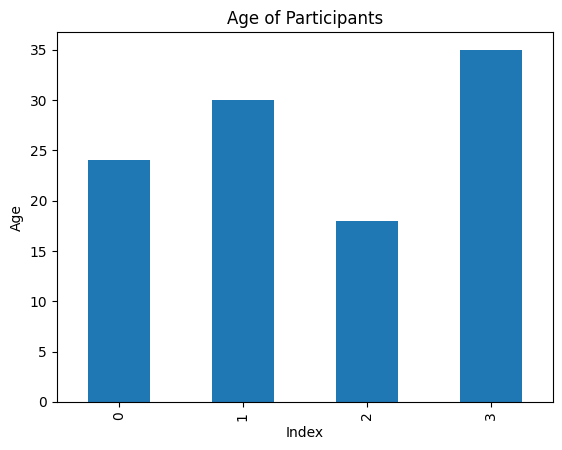

In [10]:
plt.figure()
df["Age"].plot(kind="bar")   # simple bar plot
plt.title("Age of Participants")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

In [16]:
import numpy as np

# Simulated time series of daily sales
dates = pd.date_range(start="2024-01-01", periods=60)
sales = np.random.randint(50, 300, size=60)

df_sales = pd.DataFrame({
    "Date": dates,
    "Sales": sales
})

print(df_sales.head())

        Date  Sales
0 2024-01-01    225
1 2024-01-02    181
2 2024-01-03    219
3 2024-01-04    226
4 2024-01-05    127


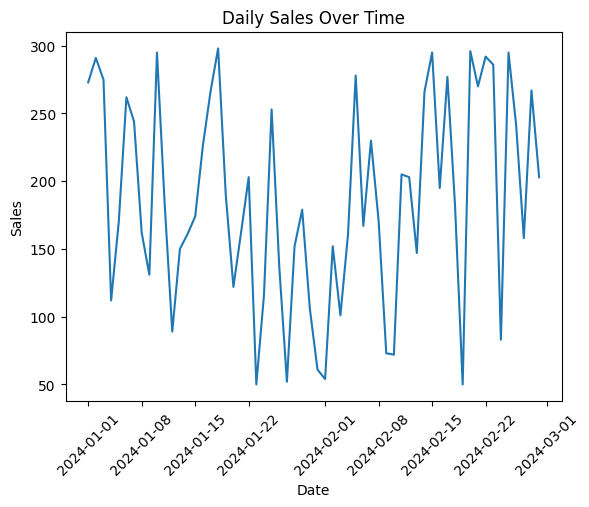

In [13]:
plt.figure()
plt.plot(df_sales["Date"], df_sales["Sales"])
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Rolling mean with a 3-day window
df_sales["Rolling_3"] = df_sales["Sales"].rolling(window=3).mean()

df_sales.head(5)

,Date,Sales,Rolling_3
0,2024-01-01,225,NaN
1,2024-01-02,181,NaN
2,2024-01-03,219,208.333333
3,2024-01-04,226,208.666667
4,2024-01-05,127,190.666667


In [22]:
# Calculate max and min for the last 3 values
df_sales["Rolling_Max_3"] = df_sales["Sales"].rolling(window=3).max()
df_sales["Rolling_Min_3"] = df_sales["Sales"].rolling(window=3).min()

print(df_sales.head(5))

        Date  Sales   Rolling_3  Rolling_Max_3  Rolling_Min_3
0 2024-01-01    225         NaN            NaN            NaN
1 2024-01-02    181         NaN            NaN            NaN
2 2024-01-03    219  208.333333          225.0          181.0
3 2024-01-04    226  208.666667          226.0          181.0
4 2024-01-05    127  190.666667          226.0          127.0


In [23]:
# We can also calculate even when we have less values than the rolling
df_sales["Rolling_Max_3"] = df_sales["Sales"].rolling(window=3, min_periods=1).max()
df_sales["Rolling_Min_3"] = df_sales["Sales"].rolling(window=3, min_periods=1).min()

print(df_sales.head(5))

        Date  Sales   Rolling_3  Rolling_Max_3  Rolling_Min_3
0 2024-01-01    225         NaN          225.0          225.0
1 2024-01-02    181         NaN          225.0          181.0
2 2024-01-03    219  208.333333          225.0          181.0
3 2024-01-04    226  208.666667          226.0          181.0
4 2024-01-05    127  190.666667          226.0          127.0


In [24]:
df_sales["Prev_Day_Sales"] = df_sales["Sales"].shift(1)

print(df_sales.head(5))

        Date  Sales   Rolling_3  Rolling_Max_3  Rolling_Min_3  Prev_Day_Sales
0 2024-01-01    225         NaN          225.0          225.0             NaN
1 2024-01-02    181         NaN          225.0          181.0           225.0
2 2024-01-03    219  208.333333          225.0          181.0           181.0
3 2024-01-04    226  208.666667          226.0          181.0           219.0
4 2024-01-05    127  190.666667          226.0          127.0           226.0


In [25]:
df_sales["Diff_vs_Prev"] = df_sales["Sales"] - df_sales["Prev_Day_Sales"]

print(df_sales.head(5))

        Date  Sales   Rolling_3  Rolling_Max_3  Rolling_Min_3  Prev_Day_Sales  \
0 2024-01-01    225         NaN          225.0          225.0             NaN   
1 2024-01-02    181         NaN          225.0          181.0           225.0   
2 2024-01-03    219  208.333333          225.0          181.0           181.0   
3 2024-01-04    226  208.666667          226.0          181.0           219.0   
4 2024-01-05    127  190.666667          226.0          127.0           226.0   

   Diff_vs_Prev  
0           NaN  
1         -44.0  
2          38.0  
3           7.0  
4         -99.0  


In [41]:
# Calculate the rolling mean based ONLY on past values
df_sales["Rolling_3_Corrent"] = df_sales["Sales"].shift(1).rolling(window=3).mean()

print(df_sales.head(5))

        Date  Sales   Rolling_3  Rolling_Max_3  Rolling_Min_3  Prev_Day_Sales  \
0 2024-01-01    225         NaN          225.0          225.0             NaN   
1 2024-01-02    181         NaN          225.0          181.0           225.0   
2 2024-01-03    219  208.333333          225.0          181.0           181.0   
3 2024-01-04    226  208.666667          226.0          181.0           219.0   
4 2024-01-05    127  190.666667          226.0          127.0           226.0   

   Diff_vs_Prev  Expanding_Mean  Rolling_3_Corrent  
0           NaN      225.000000                NaN  
1         -44.0      203.000000                NaN  
2          38.0      208.333333                NaN  
3           7.0      212.750000         208.333333  
4         -99.0      195.600000         208.666667  


In [29]:
np.random.seed(0)

df_products = pd.DataFrame({
    "Product": np.random.choice(["A","B","C","D"], size=100),
    "Revenue": np.random.randint(20, 500, size=100),
    "Quantity": np.random.randint(1, 20, size=100)
})

df_products.head()

,Product,Revenue,Quantity
0,A,141,3
1,D,446,12
2,B,104,14
3,A,223,17
4,D,344,9


In [30]:
df_products.groupby("Product").sum()

,Revenue,Quantity
Product,,
A,5390,268
B,5836,217
C,3979,175
D,9497,279


In [31]:
df_products.groupby("Product").agg({
    "Revenue": ["mean", "max", "min", "sum"],
    "Quantity": ["mean", "sum"]
})

Revenue                  Quantity     
               mean  max min   sum       mean  sum
Product                                           
A        215.600000  481  56  5390  10.720000  268
B        243.166667  480  23  5836   9.041667  217
C        209.421053  464  31  3979   9.210526  175
D        296.781250  472  20  9497   8.718750  279

In [33]:
df_left = pd.DataFrame({
    "User": [1,2,3],
    "Name": ["Alice","Bob","Charlie"]
})

df_right = pd.DataFrame({
    "User": [1,2,4],
    "Purchase": [300,150,500]
})

merged = pd.merge(df_left, df_right, on="User", how="outer")

print(merged)

   User     Name  Purchase
0     1    Alice     300.0
1     2      Bob     150.0
2     3  Charlie       NaN
3     4      NaN     500.0


![Pandas Joining](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*06LgiTX8s5AnT7B7pUg5Ig.png)

In [35]:
df_dirty = pd.DataFrame({
    "A": [1, 2, None, 4],
    "B": [None, 3, 3, None]
})

print(df_dirty)

     A    B
0  1.0  NaN
1  2.0  3.0
2  NaN  3.0
3  4.0  NaN


In [36]:
df_dirty_filled = df_dirty.fillna(0)

print(df_dirty_filled)

     A    B
0  1.0  0.0
1  2.0  3.0
2  0.0  3.0
3  4.0  0.0


In [37]:
df_dirty_clean = df_dirty.dropna()

print(df_dirty_clean)

     A    B
1  2.0  3.0


In [38]:
df_products[["Revenue","Quantity"]].corr()

,Revenue,Quantity
Revenue,1.000000,-0.023846
Quantity,-0.023846,1.000000


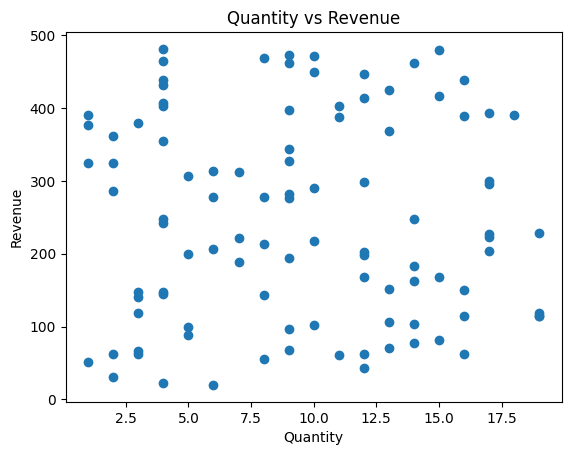

In [39]:
plt.figure()
plt.scatter(df_products["Quantity"], df_products["Revenue"])
plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

In [42]:
df_apply = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Age": [24, 30, 18, 35],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
})

In [43]:
def age_category(age):
    if age < 20:
        return "Teen"
    elif age < 30:
        return "Young Adult"
    else:
        return "Adult"

df_apply["Age_Group"] = df_apply["Age"].apply(age_category)

print(df_apply.head())

      Name  Age         City    Age_Group
0    Alice   24     New York  Young Adult
1      Bob   30  Los Angeles        Adult
2  Charlie   18      Chicago         Teen
3    Diana   35      Houston        Adult


In [50]:
df_out = pd.DataFrame({
    "Value": [10, 500, 12, 11, 13, 12, 14, 9, 10, 8, 600, 11]
})

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_out["Value"].quantile(0.25)
Q3 = df_out["Value"].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

Q1: 10.0
Q3: 13.25
IQR: 3.25
lower_bound: 5.125
upper_bound: 18.125


In [52]:
def replace_outlier_with_nan(x):
    if x < lower_bound or x > upper_bound:
        return np.nan
    return x


df_out["Filtered"] = df_out["Value"].apply(replace_outlier_with_nan)

print(df_out.head())

   Value  Filtered
0     10      10.0
1    500       NaN
2     12      12.0
3     11      11.0
4     13      13.0


In [53]:
df_out = df_out.dropna()

print(df_out.head())

   Value  Filtered
0     10      10.0
2     12      12.0
3     11      11.0
4     13      13.0
5     12      12.0


In [54]:
df_out = df_out.drop("Filtered", axis=1)

print(df_out.head())

   Value
0     10
2     12
3     11
4     13
5     12


In [59]:
df_mixed = pd.DataFrame({
    "ID": [101, 102, 103, 104],             # Numeric
    "Category": ["A", "B", "A", "C"],       # Categorical
    "Text": ["Hello world", "Python is great", "Data Science", "AI & ML"]  # Text
})

In [60]:
def text_features(text):
    if pd.isna(text):
        return pd.Series({"max_chars": 0, "spaces": 0})
    
    max_chars = len(text)
    spaces = text.count(" ")
    
    return pd.Series({
        "max_chars": max_chars,
        "spaces": spaces
    })

In [61]:
# Apply text_features to the 'Text' column
df_text_features = df_mixed["Text"].apply(text_features)

# Combine numeric/categorical columns with the new text features
df_final = pd.concat([df_mixed.drop(columns=["Text"]), df_text_features], axis=1)

print(df_final.head())

    ID Category  max_chars  spaces
0  101        A         11       1
1  102        B         15       2
2  103        A         12       1
3  104        C          7       2
